# Summarizing metrics from single lines

Leanne Friedrich 08/02/21

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [35]:
ss,u = plainIm(os.path.join(cfg.path.fig, 'stillsSummary.csv'), ic=0)
ss = ss[ss.date>210500]
ss.date = ss.date.replace(210728, 210727)
# ss['ink_surfactant']=ss['ink_surfactant'].fillna('')
# ss['ink_type'] = [row['ink_base']+row['ink_surfactant'] for i,row in ss.iterrows()]

In [162]:
ss.date.unique()

array([210727., 210728., 210517., 210519., 210824., 210518., 210630.,
       210713.])

In [163]:
ss.ink_type.unique()

array(['water', 'mineral oil', 'mineral oil_Span 20', 'PDMS_3_mineral_25',
       'PDMS_3_silicone_25', 'PEGDA_40'], dtype=object)

In [185]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

# horizontal

In [555]:
ss.keys()

Index(['bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio',
       'vRatio', 'ReRatio', 'rGrav', 'dEst', 'ink_shortname', 'ink_days',
       'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val',
       'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_v', 'ink_visc0',
       'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_rPR',
       'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant',
       'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0',
       'sup_eta0', 'sup_v', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv',
       'sup_OhInv', 'sup_rPR', 'xs_aspect', 'xs_xshift', 'xs_yshift',
       'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'xs_aspect_SE',
       'xs_xshift_SE', 'xs_yshift_SE', 'xs_areaN_SE', 'xs_wN_SE', 'xs_hN_SE',
       'xs_roughness_SE', 'vert_wN', 'vert_hN', 'vert_vN', 'vert_roughness',
       'vert_meanTN', 'vert_stdevTN', 'vert_minmaxTN', 'vert_wN_SE',
       'vert_hN_SE', 'vert_vN_SE', 'v

In [20]:
ss1[ss1.horiz_roughness>0.1]

,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,ReRatio,...,horiz_maxlenN_SE,horiz_totlenN_SE,horiz_vN_SE,horiz_roughness_SE,horiz_meanTN_SE,horiz_stdevTN_SE,horiz_minmaxTN_SE,vHorizEst,sup_Ca,ink_Ca
301,I_PDMSS7.5_S_4.00_210713,210713,42,0.603,0.907,True,True,0.043212,1.0,15.096717,...,0.185377,0.272218,0.008452,0.265606,0.031887,0.002582,0.011880,2.033020,4.413544,0.190717
300,I_PDMSS7.5_S_3.50_210713,210713,42,0.603,0.907,True,True,0.091450,1.0,7.270753,...,0.133681,0.083338,0.331897,0.115402,0.283707,0.000999,0.005745,1.669145,2.085475,0.190717
286,I_PDMSS10_S_3.50_210713,210713,42,0.603,0.907,True,True,0.216746,1.0,3.044553,...,0.043940,0.043940,0.287027,0.317102,0.207446,0.000265,0.003060,1.202029,2.085475,0.452019
287,I_PDMSS10_S_4.00_210713,210713,42,0.603,0.907,True,True,0.102416,1.0,6.321594,...,0.007720,0.007720,0.006277,0.001397,0.007686,0.000136,0.001117,1.534591,4.413544,0.452019
289,I_PDMSS12.5_S_3.00_210713,210713,42,0.603,0.907,True,True,0.453829,1.0,1.448258,...,0.047843,0.059586,0.332282,0.323662,0.253990,0.000234,0.001364,1.423894,1.120683,0.508599
295,I_PDMSS5_S_3.00_210713,210713,42,0.603,0.907,True,True,0.131029,1.0,4.959892,...,0.025952,0.025952,0.331868,0.328278,0.245664,0.000058,0.000140,1.467095,1.120683,0.146842


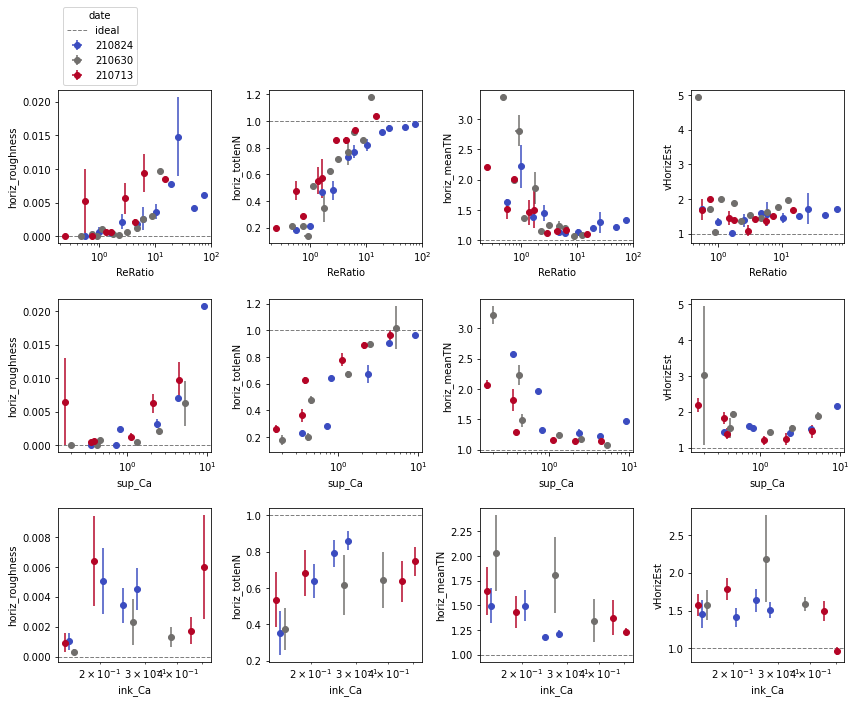

In [8]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(3,4,figsize=(12,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=([0,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

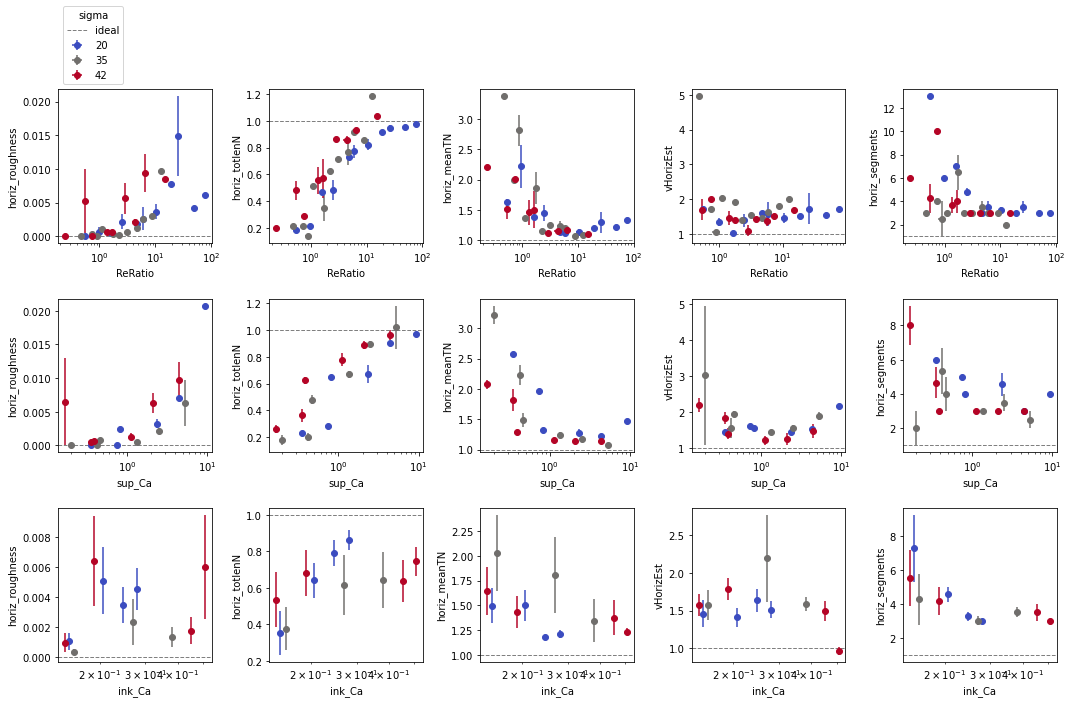

In [19]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(3,5,figsize=(15,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst', 'horiz_segments']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=([0,1,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

In [37]:
ss1[(ss1.ReRatio<1)&(ss1.sigma==35)][['bn', 'horiz_segments']]

,bn,horiz_segments
276,I_PDMSM7.5_S_2.25_210630,3.0
267,I_PDMSM10_S_2.50_210630,4.0


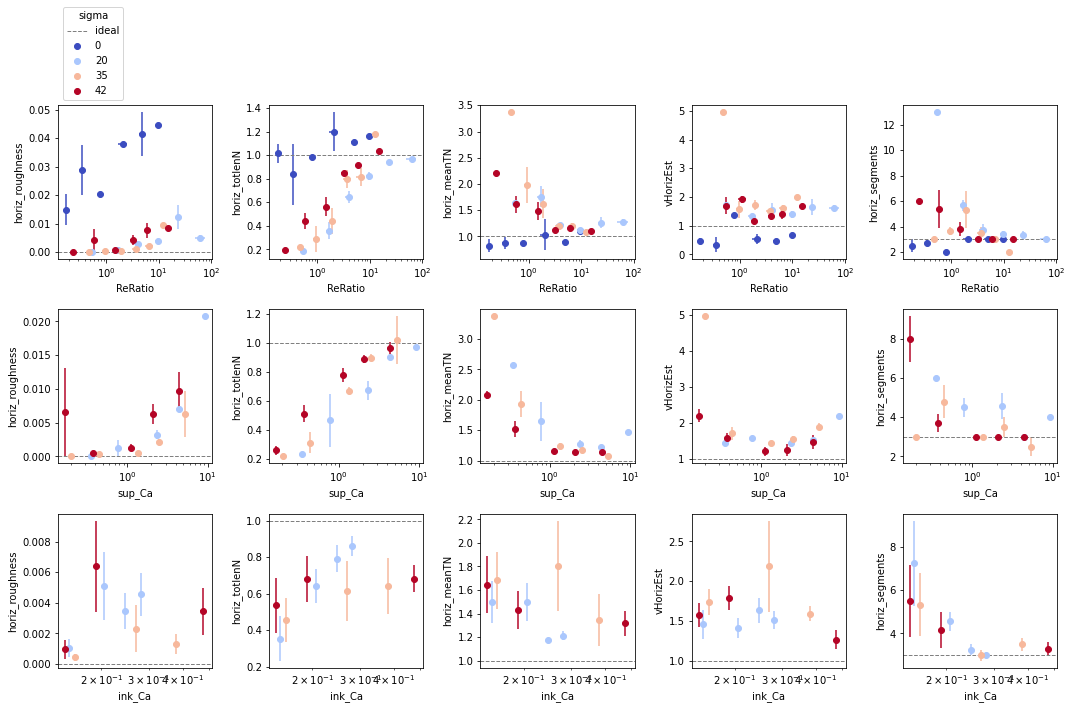

In [36]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base!="PEGDA_40"]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1[ss1.horiz_segments!=12]
ss1 = ss1[ss1.horiz_totlenN_SE<0.25]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(3,5,figsize=(15,10))
for j,s2 in enumerate(['ReRatio', 'sup_Ca', 'ink_Ca']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst', 'horiz_segments']):
        mp.scatterSS(ss1, s2, s, 'sigma', logx=True, yideal=([0,1,1,1,3][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0), dx=0.2)
fig.tight_layout()

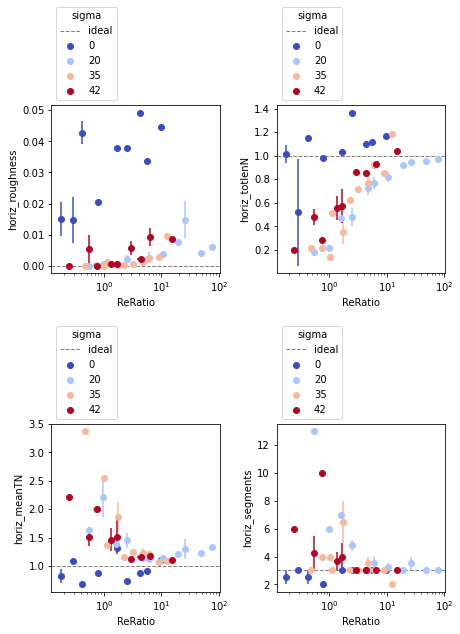

In [40]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base!="PEGDA_40"]
ss1 = ss1[ss1.ink_days==1]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1[ss1.horiz_segments!=12]
ss1 = ss1[ss1.horiz_totlenN_SE<0.25]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
fig,axs = plt.subplots(2,2,figsize=(6.5,9))
mp.scatterSS(ss1, 'ReRatio', 'horiz_roughness', 'sigma', logx=True, yideal=(0), ax=axs[0][0], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_totlenN', 'sigma', logx=True, yideal=(1), ax=axs[0][1], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_meanTN', 'sigma', logx=True, yideal=(1), ax=axs[1][0], fig=fig, units=u)
mp.scatterSS(ss1, 'ReRatio', 'horiz_segments', 'sigma', logx=True, yideal=(3), ax=axs[1][1], fig=fig, units=u)
fig.tight_layout()
fig.savefig(os.path.join(cfg.path.fig, 'figures', 'horiz_measures.svg'), bbox_inches='tight', dpi=300)

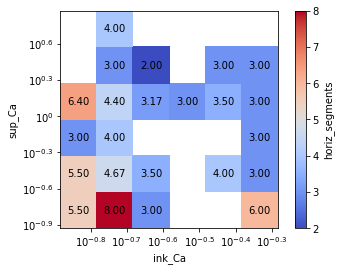

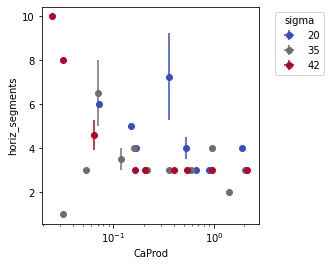

In [23]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.sigma>0]
ss1 = ss1[ss1.horiz_roughness<0.05]
ss1 = ss1.sort_values(by='sigma')
ss1['sup_Ca'] = 1/ss1['sup_CaInv']
ss1['ink_Ca'] = 1/ss1['ink_CaInv']
ss1['CaProd'] = ss1['sup_Ca']*ss1['ink_Ca']
mp.colorMeshSS(ss1, 'ink_Ca', 'sup_Ca', 'horiz_segments', logx=True,logy=True, dx=0.2, dy=0.2)
mp.scatterSS(ss1, 'CaProd',  'horiz_segments', 'sigma', logx=True,logy=False)
fig.tight_layout()

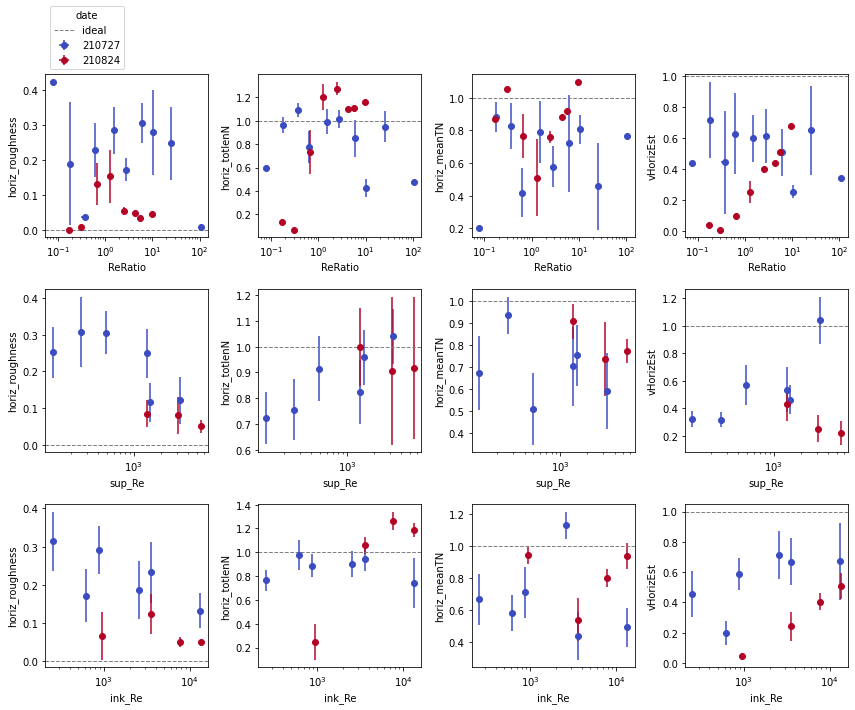

In [12]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
fig,axs = plt.subplots(3,4,figsize=(12,10))
for j,s2 in enumerate(['ReRatio', 'sup_Re', 'ink_Re']):
    for i,s in enumerate(['horiz_roughness', 'horiz_totlenN', 'horiz_meanTN', 'vHorizEst']):
        mp.scatterSS(ss1, s2, s, 'date', logx=True, yideal=([0,1,1,1][i]), ax=axs[j][i], fig=fig, legend=(i==0 and j==0))
fig.tight_layout()

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b8bf5da988>)

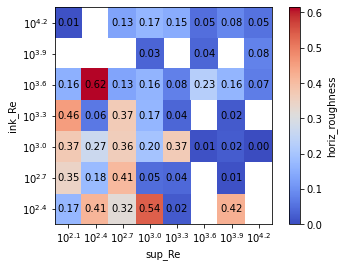

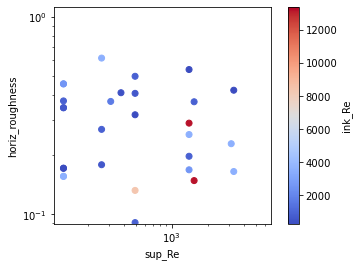

In [15]:
ss1 = ss.copy()
# ss1 = ss1[ss1.vert_hN_SE<1]
# ss1.loc[(ss1.ink_base == 'PEGDA_40'),'sigma']=0.01
ss1 = ss1[ss1.ink_base=='water']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
mp.colorMeshSS(ss1, 'sup_Re', 'ink_Re', 'horiz_roughness', logx=True, logy=True)
mp.scatterSS(ss1, 'sup_Re',  'horiz_roughness','ink_Re', logx=True, logy=True, gradColor=True, dx=0, dy=0)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b8c0345948>)

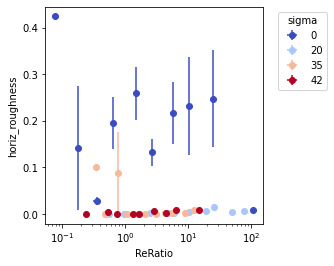

In [17]:
ss1 = ss.copy()
ss1 = ss1[ss1.ink_base!='PEGDA_40']
ss1  = ss1[ss1.ink_days==1]
ss1 = ss1.sort_values(by='sigma')
ss1 = ss1[ss1.horiz_meanTN<4]
mp.scatterSS(ss1, 'ReRatio',  'horiz_roughness','sigma', logx=True, logy=False, gradColor=False)